<a href="https://colab.research.google.com/github/spdr-lily/Descomplica-Data-Science/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pré-processamento e Análise de Palavras-Chave no Processamento de Linguagem Natural (PLN) Estatístico

In [22]:
# importação das bibliotecas
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Baixando recursos necessários do NLTK
nltk.download('punkt') # Baixa o tokenizer de palavras
nltk.download('stopwords') # Baixa a lista de stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# texto
texto = """Com a evolução contínua da tecnologia, o processamento de linguagem natural (PLN) tornou-se uma ferramenta essencial na análise de grandes volumes de dados textuais. O PLN permite que máquinas compreendam e interpretem a linguagem humana, facilitando a extração de informações valiosas e a automação de tarefas que antes exigiam intervenção humana. Técnicas avançadas de PLN são utilizadas em diversas aplicações, desde assistentes virtuais até sistemas de recomendação, contribuindo significativamente para a eficiência e a personalização dos serviços oferecidos. À medida que o campo avança, novas metodologias e algoritmos são desenvolvidos para aprimorar a precisão e a eficácia do PLN, tornando-o uma área de estudo fascinante e em constante evolução."""

In [26]:
# Tokenização: Converte o texto para minúsculas e divide em palavras individuais
tokens = texto.lower().split()

In [30]:
# Remover stopwords e caracteres não alfabéticos
stop_words = set(stopwords.words('portuguese'))  # Obtém a lista de stopwords em português
tokens_filtrados = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove pontuação e stopwords
print("Tokens Normalizados:", tokens_filtrados)  # Exibe os tokens processados

Tokens Normalizados: ['evolução', 'contínua', 'processamento', 'linguagem', 'natural', 'ferramenta', 'essencial', 'análise', 'grandes', 'volumes', 'dados', 'pln', 'permite', 'máquinas', 'compreendam', 'interpretem', 'linguagem', 'facilitando', 'extração', 'informações', 'valiosas', 'automação', 'tarefas', 'antes', 'exigiam', 'intervenção', 'técnicas', 'avançadas', 'pln', 'utilizadas', 'diversas', 'desde', 'assistentes', 'virtuais', 'sistemas', 'contribuindo', 'significativamente', 'eficiência', 'personalização', 'serviços', 'medida', 'campo', 'novas', 'metodologias', 'algoritmos', 'desenvolvidos', 'aprimorar', 'precisão', 'eficácia', 'área', 'estudo', 'fascinante', 'constante']


In [34]:
# Análise de palavras-chave
frequencia_palavras = Counter(tokens_filtrados)  # Conta a frequência de cada palavra
print("\nFrequência das palavras-chave:")
for palavra, freq in frequencia_palavras.most_common(10):  # Exibe as 10 palavras mais frequentes
    print(f"{palavra}: {freq}")


Frequência das palavras-chave:
linguagem: 2
pln: 2
evolução: 1
contínua: 1
processamento: 1
natural: 1
ferramenta: 1
essencial: 1
análise: 1
grandes: 1


In [35]:
# Treinamento do modelo Word2Vec
modelo_w2v = Word2Vec([tokens_filtrados], vector_size=100, window=5, min_count=1, workers=4)

In [36]:
# Imprimir vetor da palavra "processamento"
if "processamento" in modelo_w2v.wv:
      print("\nVetor para a palavra 'processamento':")
      print(modelo_w2v.wv["processamento"])  # Exibe o vetor numérico da palavra "processamento"
else:
      print("\nA palavra 'processamento' não foi encontrada no vocabulário do modelo.")


Vetor para a palavra 'processamento':
[-2.3608636e-04  4.2181364e-03  2.1130261e-03  9.9958088e-03
  6.3038833e-04 -5.4652519e-03 -1.1794198e-03  2.0715105e-03
 -3.3738450e-03 -7.8471880e-03 -5.5997125e-03 -6.7503336e-03
  6.3538151e-03  3.9237160e-03  8.2167974e-03  6.5196259e-03
 -6.1277421e-03  2.7169907e-03  8.4729018e-03  1.5973609e-03
  3.0690914e-03  5.8112624e-03 -8.8400980e-03  9.1234446e-03
  6.8202605e-03  8.5095121e-03 -8.2267849e-03  6.1758491e-03
  6.6306805e-03 -1.3584204e-03 -6.2925285e-03  5.3258548e-03
 -6.8600662e-03 -5.3231618e-03  3.5120314e-03  8.0805002e-03
  8.6934613e-03 -4.4040391e-03 -9.1871899e-03  9.6061006e-03
  6.2892311e-03 -3.9670044e-03 -8.4581571e-03 -4.7172070e-03
 -3.9580222e-03 -3.2727211e-03  8.1833126e-04 -2.9676387e-04
 -3.1110661e-03 -5.9963311e-03  9.4193714e-03 -4.7263773e-03
 -7.2626234e-03  7.6845987e-03  2.5184308e-03  8.6281570e-03
 -4.4647232e-03 -6.8915468e-03  9.8616397e-04 -1.1726558e-03
 -9.3966704e-03 -1.6012333e-03  3.0513001e-03 

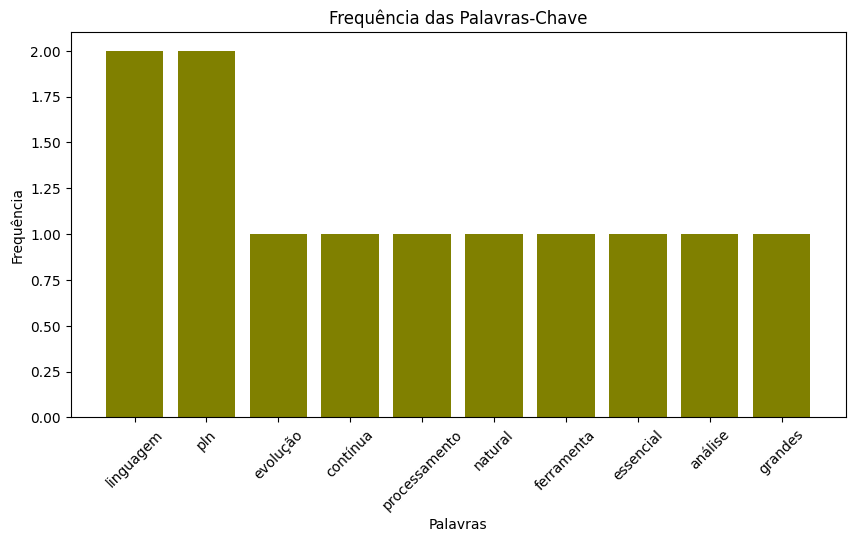

In [44]:
# Visualização das palavras-chave
palavras, contagens = zip(*frequencia_palavras.most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(palavras, contagens, color='olive')
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.title("Frequência das Palavras-Chave")
plt.xticks(rotation=45)
plt.show()